## 1. Матрица Вандермонда (10 баллов)

Напишите функцию, генерирующую матрицу [Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(𝑥_1,...,𝑥_𝑛)$ .
В этом задании запрещается пользоваться готовыми реализациями (например, numpy.vander), а также np.repeat и np.transpose.
При решение задействуйте np.reshape и/или np.newaxis.

In [1]:
import numpy as np

vect = np.array([1,2,3,4,5])

def vanderbro(vector):
    vander_bro_matr = np.zeros(vector.shape[0] * vector.shape[0])
    vander_bro_matr = vander_bro_matr.reshape(vector.shape[0], vector.shape[0])
    for i in range(vector.shape[0]):
        vander_bro_matr[i:i+1,:] = pow(vector, i)
    return  vander_bro_matr

print(vanderbro(vect))

'''Определитель моей матрицы равен определителю np.vander(vect) и определителю, представленному в Википедии: 288'''


[[  1.   1.   1.   1.   1.]
 [  1.   2.   3.   4.   5.]
 [  1.   4.   9.  16.  25.]
 [  1.   8.  27.  64. 125.]
 [  1.  16.  81. 256. 625.]]


'Определитель моей матрицы равен определителю np.vander(vect) и определителю, представленному в Википедии: 288'

## 2. Марафон (30 баллов)

#### История
Как-то раз Винни-Пух, Пятачок, Кролик и Иа-Иа решили пробежать марафон. Они договорились бежать $n$ часов. Побеждает тот, кто пробегает за эти $n$ часов больше всего километров. Каждый участник бежит по-разному, то сколько он пробежит за один час поддается одному из законов распределений. Например, если имеется равномерное распределение $U[1,3]$, то участник может пробежать за первый час 1.3км, за второй 2.4км и так далее.

* Винни-Пух в целом может пробежать достаточно много, но с большой вероятностью останавливается покушать мёда и пробегает мало. Его закон распределения это показательное распределение с $\lambda = 1$.
* Пятачок бежит в одном темпе и старается пробегать приблизительно одинаковую дистанцию. Изредка, он может перепутать направление и немного пробежать не в ту сторону. Его закон распределения это нормальное распределение $N(1, 1)$.
* Кролик - перфекционист. Он бежит целое количество киллометров. Если он понимает, что за оставшееся время он уже не пробежит еще один километр, то он останавливается и ждет следующий час. Его закон распределения это распределение Пуассона с $\lambda = 1$.
* Иа-Иа в течение часа может грустить с вероятностью 0.5 и пробжеать 0 километров или быть очень веселым (с вероятностью 0.5) и пробежать 2 километра. Его закон распределения это распределение Бернулли.

#### Задание №1

Вам нужно: 
* Создать трехмерную матрицу размера $10^4 \times 4 \times n$. Первая ось отвечает за номер марафона, вторая ось за каждого участника, а третья ось за каждый час марафона. Вторую и третью ось можно поменять, если вам так удобнее.
* Выявить победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.
* Запрещено пользоваться циклами. Нужно использовать возможности numpy.

Что можно сказать о результатах?

#### Задание №2
 
Участники решили объединиться в пары: Винни-Пух с Пятачком, Кролик с Иа-Иа. Они решили суммировать свои результаты.

Вам нужно: 
* Сгенерировать новую трехмерную матрицу, но уже объединив участников в команды.
* Выявить команду-победителя в каждом из $10^4$ марафонов. 
* Нарисовать столбчатую диаграмму, на которой будет видно кто и сколько раз побеждал в марафоне.

Логичны ли полученные результаты?

Rabbit has the most wins: 2711


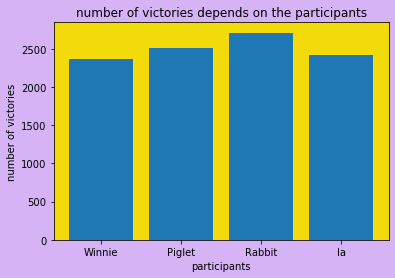

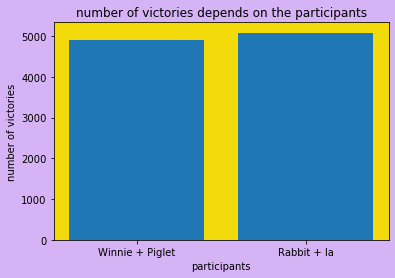

In [2]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import bernoulli
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

'''Поскольку n нигде явно не указано, выбираю, какое мне нравится\n
   Полагаю, больше 10 часов бега - издевательство над животными, поэтому ставлю n=10'''

n = 10
N = pow(10,4)

winner = {0:'Winnie', 1:'Piglet', 2:'Rabbit', 3:'Ia'}


matr = np.zeros(N*4*n)
matr = matr.reshape(N,4,n)


for index ,v in np.ndenumerate(matr):

    if index[1] % 4 == 0:
        k = random.expovariate(1)
        matr[index] = k
    elif index[1] % 4 == 1:
        k = np.random.normal(1,1)
        matr[index] = k
    elif index[1] % 4 == 2:
        k = poisson.rvs(1, size=1)[0]
        matr[index] = k
    elif index[1] % 4 == 3:
        k = bernoulli.rvs(0.5, size=1)[0]
        matr[index] = k*2


sum_matr = matr.sum(axis = 2)

result_arr = np.argmax(sum_matr, axis = 1)

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]


result_list = list(result_arr)
winnie_cnt = result_list.count(0)
piglet_cnt = result_list.count(1)
rabbit_cnt = result_list.count(2)
ia_cnt = result_list.count(3)


print('{} has the most wins: {}'.format(winner[most_frequent(result_arr)], result_list.count(most_frequent(result_arr))))


df = pd.DataFrame({'Name':['Winnie', 'Piglet', 'Rabbit', 'Ia'],
                   'Victories':[winnie_cnt, piglet_cnt, rabbit_cnt, ia_cnt]
                   } ,index= ['W','P','R','I'])


fig, ax = plt.subplots()
ax.bar(df['Name'], df['Victories'])
ax.set_facecolor('#f3da0b')
fig.set_facecolor('#d5b3f5')
ax.set_xlabel('participants')
ax.set_ylabel('number of victories')
plt.title('number of victories depends on the participants')
plt.show()



'''Part 2'''
sum_matr2 = np.zeros(N*2)
sum_matr2 = sum_matr2.reshape(N,2)
sum_matr2[:,:1] = sum_matr[:,:1] + sum_matr[:,1:2]
sum_matr2[:,1:2] = sum_matr[:,2:3] + sum_matr[:,3:]

result_arr2 = np.argmax(sum_matr2, axis = 1)
result_list2 = list(result_arr2)

w_p_cnt = result_list2.count(0)
r_i_cnt = result_list2.count(1)

df2 = pd.DataFrame({'Pairs':['Winnie + Piglet', 'Rabbit + Ia'],
                   'Victories':[w_p_cnt, r_i_cnt]
                   } ,index= ['W+P', 'R+I'])


fig2, ax2 = plt.subplots()
ax2.bar(df2['Pairs'], df2['Victories'])
ax2.set_facecolor('#f3da0b')
fig2.set_facecolor('#d5b3f5')
ax2.set_xlabel('participants')
ax2.set_ylabel('number of victories')
plt.title('number of victories depends on the participants')
plt.show()


## 3. Avito (30 баллов)

В этом задании вам нужно будет написать функцию, которая парсит [Авито](https://www.avito.ru) (будем рассматривать только Москву). Эта функция принимает два параметра:
* search - то, что мы ищем на avito
* page - номер страницы, с которой парсим информацию

```python
def parse_page(search, page):
    # тут ваш код
df = parse_page('гречка', 4)
```
Нужно скачать следующую информацию:
* название объявления
* ссылка на объявление
* цена
* метро (если есть), вам нужно аккуратно обрабатывать None или использовать конструкцию try-except
* сколько метров от метро (если есть)

Эту информацию лучше сохранить в виде pandas df.

В данном задании **не нужно** парсить все страницы (вас могут забанить). Нужно лишь сделать функцию, которая парсит одну страницу. Чтобы вас не забанили сделаейте request один раз и работайте с вашей страничкой без функции. После того как все будет готово, оберните весь ваш код в функцию.

In [16]:
!pip install bs4
!pip install selenium
'''делала в pycharm, у меня на компе все прогоняется/ тут в notebook - требуется "geckodriver", загружу его вместе с ipynb в гите '''
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver


def parse_page(search, page):
    ffox = webdriver.Firefox()

    url = 'https://www.avito.ru/moskva/'

    ffox.get(url)

    search_field = ffox.find_element_by_id('search')
    search_field.send_keys('{}'.format(search))

    search_button = ffox.find_element_by_class_name(
        'index-buttonElement-3wfmP.button-button-2Fo5k.button-size-s-3-rn6.button-default-mSfac')
    search_button.click()

    cur_url = ffox.current_url
    url = cur_url + '&p={}'.format(page)
    ffox.get(url)
    ffox.close()


    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    advertisement = soup.find_all('div', {'class': 'item__line'})

    data = []

    for adv in advertisement:

        price = (adv.find('span', {'class': 'snippet-price'}).get_text().strip())
        title = (adv.find('a', {'class': 'snippet-link'}).get_text().strip())
        link = ('https://www.avito.ru' + (adv.find('a', {'class': 'snippet-link'}).get('href')))
        try:
            metro = (adv.find('span', {'class': 'item-address-georeferences-item__content'}).get_text().strip())
        except:
            metro = (None)
        try:
            distance = (adv.find('span', {'class': 'item-address-georeferences-item__after'}).get_text().strip())

        except:
            distance = (None)

        data.append({'title': title, 'price': price,
                     'metro': metro, 'distance': distance, 'link': link})

    return data


search = 'сибирская кошка'
page = '2'

result = pd.DataFrame(parse_page(search, page))
result = result.sort_values('price')
print(result)


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


WebDriverException: Message: 'geckodriver' executable needs to be in PATH. 


## 4. Walmart (30 баллов)

В файле *walmart.csv* нам предоставлены исторические данные о продажах магазинов Walmart, расположенных в разных регионах.

Нам доступны следующие переменные:

* **Date** – дата;
* **Store** – номер магазина;
* **Dept** – номер отдела;
* **Weekly_Sales** – объём продаж в данную неделю в данном отделе
* **Type** – тип магазина;
* **Size** – размер магазина;
* **IsHoliday** – является ли неделя праздничной;
* **Temperature** – средняя температура в регионе в градусах по Фаренгейту;
* **Fuel_Price** – стоимость топлива в регионе;
* **MarkDown1-5** – данные, связанные с рекламными уценками, которые запускает Walmart. Данные уценки доступны только после ноября 2011 года и доступны не для всех магазинов. Данные анонимизированы. Непонятно на какие именно товары производилась уценка и в каких количествах. Компании часто анонимизируют данные, когда выкладывают их в открытый доступ.
* **CPI** – индекс потребительских цен;
* **Unemployment** – уровень безработицы.


Вам нужно выполнить следующие задания:
1. Загрузить файл с данными. Отобразить первые и последние 5 наблюдений. Узнать сколько наблюдений и переменных есть в вашем наборе данных. Какой тип(формат) имеет каждая переменная? Привести переменную Date к формату даты.
2. Разобраться с пропущенными значениями:
    * вывести сколько пропущенных значений в процентах есть в каждой переменной;
    * удалить переменные, которые имеют более 60% пропущенных значений.
3. Сколько магазинов и отделов присутствует в выборке, за какой период времени у нас имеются данные? 
4. Посмотреть динамику продаж в магазинах walmart в целом. Для этого можно построить график, где по оси X будет дата, а по оси Y продажи всей сети Walmart.
5. Найдите и нарисуйте матрицу корреляции для числовых показателей.
6. Найдите топ-5 самых больших магазинов по суммарным продажам за все время и отобразите динамику их продаж на одном графике.
7. Найдите топ-10 самых больших отделов по суммарным продажам за 2011 год среди магазинов с типом А и нарисуйте столбчатую диаграмму для них

In [147]:
# ваше решение тут

## 5. Парадокс дней рождений (30 баллов)

Прочитайте на википедии про [парадокс дней рождений](https://ru.wikipedia.org/wiki/Парадокс_дней_рождения). В этой задаче нам предстоит его проверить. Итак, в произвольной группе из  $50$ человек вероятность того, что хотя бы у двоих людей дни рождения совпадут, равна  $0.97$. Но это всё только в теории. При решении задачи мы предполагаем, что рождения людей равномерно распределены в течение года. Однако на практике это может быть не так. В связи с этим реальная вероятность может отличаться от теоретической.

В этой задачке вам предстоит проверить парадокс дней рождений на эмпирических данных. От вас требуется:
1. Выбрать какое-то большое сообщество в Vk. С помощью VkAPI выкачать инфорацию по ее подписчикам (самое главное это дата рождения, а также id пользователя, который будет его характеризовать. Не оставляйте свой токен 
2. Удалите из данных всех, кто не указал когда он родился. Приведите колонку с датами рождений к удобному, однообразному виду.
3. Постройте гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?
4. Эмпирически оцените вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения. Для этого напишите цикл, в ходе которого из таблички будет делаться подвыборка из 50 строк. Для этих 50 строк внутри условия вы должны проверить совпадение дней рождений. Если совпало, то нужно запомнить это в переменную счётчик, которую вы впоследствии, чтобы получить вероятность, поделите на длину цикла.

**Обратите внимание, что часто придётся прогонять один и тот же код. Не надо его копировать. Оформите его в виде функции.** 

In [ ]:
'''делала в pycharm, у меня на компе все прогоняется/ тут в notebook -  та же ошибка, что при неправильном токене (при добавлении secret_token.txt, естественно)/ могу приложить видео или скрины, что все отработало, jupyter меня не любит  '''
!pip install tqdm


import requests
import numpy as np
import  time
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


version = '5.103'
group_id = 'jasonstatham_officialgroup'
bdate = 'bdate'

with open('secret_token.txt') as f:
    token = f.read()


def vkDownload(method, parameters, token=token, version=version):

    url = 'https://api.vk.com/method/{method}?{parameters}&access_token={token}&v={version}'
    url = url.format(method=method, parameters=parameters, token=token, version=version)
    response = requests.get(url).json()

    return response


def getGroupMembers(group_id):

    count = vkDownload('groups.getMembers', 'group_id=' + group_id)['response']['count']

    n = int(np.ceil(count / 1000))

    members = []

    for i in range(n):
        current_members = vkDownload('groups.getMembers', 'group_id=' + group_id + '&offset=' + str(1000 * i))
        members.extend(current_members['response']['items'])
        time.sleep(0.4)

    return members


jason1 = getGroupMembers(group_id)

dict_dates = {}
Count = vkDownload('groups.getMembers', 'group_id=' + group_id)['response']['count']
N = Count // 50

for i in tqdm(range(N)):
    jason11 = jason1[(i * 50): (i * 50 + 49)].copy()

    jason1_str = ','.join([str(user) for user in jason11])

    fun = vkDownload('users.get', 'user_ids={}&fields={}'.format(jason1_str, bdate))['response']

    time.sleep(0.4)

    for el in fun:
        try:
            if len(el['bdate']) > 5:
                dict_dates.update({el['id']: el['bdate'][:-5]})
            else:
                dict_dates.update({el['id']: el['bdate']})
        except:
            pass



jason11 = jason1[(N * 50):].copy()
jason1_str = ','.join([str(user) for user in jason11])
fun = vkDownload('users.get', 'user_ids={}&fields={}'.format(jason1_str, bdate))['response']

for el in fun:
    try:
        if len(el['bdate']) > 5:
            dict_dates.update({el['id']: el['bdate'][:-5]})
        else:
            dict_dates.update({el['id']: el['bdate']})
    except:
        pass


dict_num_date = {}
dict_with_months = {i + 1 : 0 for i in range(12)}
cnt = 0
for k, v in dict_dates.items():
    dict_num_date.update({cnt : v})
    v = dict_dates[k].split('.')[1]
    dict_with_months[int(v)] += 1
    cnt +=1


df = pd.DataFrame({'Month':[i for i in dict_with_months.keys()] , 'Values': [i for i in dict_with_months.values()]})

fig, ax = plt.subplots()
ax.bar(df['Month'], df['Values'])
ax.set_facecolor('#f3da0b')
fig.set_facecolor('#d5b3f5')
ax.set_xlabel('months')
ax.set_ylabel('number of birthdays')
plt.title('number of birthdays depends on the month')
plt.show()


'''в задании сказано держать дату рождения и id в одном месте, и это - dict_dates - всегда можно посмотреть эти данные
но мне этим пользоваться не нравится, поэтому я делаю другие словари с другими парами ключ-значение'''
M = len(dict_num_date) // 50
counter = 0
for m in range(M):
    for i in range(m*50, m*50 + 49):
        if dict_num_date[i] == dict_num_date[i+1]:
            counter +=1
            break

for i in range(M*50, len(dict_num_date)-1):
    if dict_num_date[i] == dict_num_date[i + 1]:
        counter += 1
        break

print('Вероятность совпадений др в 1 день в данном паблике у людей с выставленной датой рождения: {}%'.format(round(counter/(M+1)*100, 4)))